<h1 id="tocheading">Table of Contents</h1>
<br />
<div id="toc"><ul class="toc"><li><a href="#1.-Introduction">1. Introduction</a><a class="anchor-link" href="#1.-Introduction">¶</a></li><li><a href="#2.-Running-a-Python-Script-to-Explore-the-Columns">2. Running a Python Script to Explore the Columns</a><a class="anchor-link" href="#2.-Running-a-Python-Script-to-Explore-the-Columns">¶</a></li><li><a href="#3.-Using-Pandas-to-Find-Patterns-in-the-Data">3. Using Pandas to Find Patterns in the Data</a><a class="anchor-link" href="#3.-Using-Pandas-to-Find-Patterns-in-the-Data">¶</a></li><li><a href="#4.-Using-Pandas-to-Explore-Enrollment-by-Race">4. Using Pandas to Explore Enrollment by Race</a><a class="anchor-link" href="#4.-Using-Pandas-to-Explore-Enrollment-by-Race">¶</a></li><li><a href="#5.-Moving-the-Data-Files-to-a-Separate-Folder">5. Moving the Data Files to a Separate Folder</a><a class="anchor-link" href="#5.-Moving-the-Data-Files-to-a-Separate-Folder">¶</a></li><li><a href="#6.-Next-Steps">6. Next Steps</a><a class="anchor-link" href="#6.-Next-Steps">¶</a></li><ul class="toc"><li><a href="#6.1.-Review-explusions">6.1. Review explusions</a><a class="anchor-link" href="#6.1.-Review-explusions">¶</a></li><ul class="toc"><li><a href="#6.1.1.-Students-without-disabilities-who-received-an-expulsion-without-educational-services">6.1.1. Students without disabilities who received an expulsion without educational services</a><a class="anchor-link" href="#6.1.1.-Students-without-disabilities-who-received-an-expulsion-without-educational-services">¶</a></li><li><a href="#6.1.2-Students-without-disabilities-who-received-an-expulsion-without-educational-services">6.1.2 Students without disabilities who received an expulsion without educational services</a><a class="anchor-link" href="#6.1.2-Students-without-disabilities-who-received-an-expulsion-without-educational-services">¶</a></li></ul><li><a href="#6.2.-Gender-and-race-differences-in-SAT-scores">6.2. Gender and race differences in SAT scores</a><a class="anchor-link" href="#6.2.-Gender-and-race-differences-in-SAT-scores">¶</a></li></ul><li><a href="#7.-Tasks-for-later">7. Tasks for later</a><a class="anchor-link" href="#7.-Tasks-for-later">¶</a></li></ul></div>

Project guide: https://www.dataquest.io/m/220/guided-project%3A-working-with-data-downloads

<br /><br />

This project originally requires command line. However, I will include only the Python codes in this notebook in case this notebook is not fully suited for such use.


# 1. Introduction
The dataset is a subset of the data from https://catalog.data.gov/dataset/civil-rights-data-collection-2013-14.

The dataset ["contains information on educational achievement and opportunities in the U.S., broken down by race and school"](https://www.dataquest.io/m/220/guided-project%3A-working-with-data-downloads).

# 2. Running a Python Script to Explore the Columns

Create `data` directory and move all `CRDC...` files in there. This is originally meant for [step 5](#5.-Moving-the-Data-Files-to-a-Separate-Folder), after which file paths in Python codes are to be updated. However, it's done here because it's difficult to demonstrate the flow inside a notebook.

Then, write code in `read.py` to make it read in `CRDC2013_14content.csv` and print first few rows

In [1]:
"""
code to go into read.py
"""

import pandas as pd

if __name__ == "__main__":
    # read in data
    contents = pd.read_csv("data/CRDC2013_14content.csv")

    # print first five rows
    print(contents.head(5))

        NAME  VARNUM  TYPE                                              LABEL  \
0  LEA_STATE       1  text                                     District State   
1   LEA_NAME       2  text                                      District Name   
2   SCH_NAME       3  text                                        School Name   
3   COMBOKEY       4  text  7 Digit LEAID District Identification Code+5 D...   
4      LEAID       5  text         7 Digit LEAID District Identification Code   

  PART  QUESTION  
0  NaN       NaN  
1  NaN       NaN  
2  NaN       NaN  
3  NaN       NaN  
4  NaN       NaN  


# 3. Using Pandas to Find Patterns in the Data

DataQuest's team found two interesting columns, `JJ` and `SCH_STATUS_MAGNET`. Former represents schools in juvenile justice facility. Latter represents magnet schools where students with high scores on certain tests are accepted.

Create `exploration.py` and write a code into it which will read in `CRDC2013_14.csv` and unique values for the two columns.

Then, make pivot tables to get numbers of enrolled males and females (`TOT_ENR_M` and `TOT_ENR_F`) per school.

In [2]:
import pandas as pd
import numpy as np

if __name__ == "__main__":

    # read in dataset
    data = pd.read_csv("data/CRDC2013_14.csv", encoding="Latin-1")

    # 1. display value counts
    # JJ
    print(data["JJ"].value_counts())
    print("")

    # SCH_STATUS_MAGNET
    print(data["SCH_STATUS_MAGNET"].value_counts())
    print("")
    
    # 2. print male and female enrolment counts
    # JJ
    jj_gen_enr = data.pivot_table(index="JJ", values=["TOT_ENR_M", "TOT_ENR_F"], aggfunc=np.sum)
    print("Enrolment counts by gender in schools in juvenile justice system")
    print(jj_gen_enr)
    print("")
    
    # SCH_STATUS_MAGNET
    magnet_gen_enr = data.pivot_table(index="SCH_STATUS_MAGNET", values=["TOT_ENR_M", "TOT_ENR_F"], aggfunc=np.sum)
    print("Enrolment counts by gender in magnet schools")
    print(magnet_gen_enr)
    print("")

NO     992
YES      8
Name: JJ, dtype: int64

NO     948
YES     52
Name: SCH_STATUS_MAGNET, dtype: int64

Enrolment counts by gender in schools in juvenile justice system
     TOT_ENR_F  TOT_ENR_M
JJ                       
NO      252915     266702
YES         71        427

Enrolment counts by gender in magnet schools
                   TOT_ENR_F  TOT_ENR_M
SCH_STATUS_MAGNET                      
NO                    232487     245629
YES                    20499      21500



```
Both magnet schools (MS) and schools in juvenile justics facilities (JJS) formed minority. A total of 8 JJS and and 552 MS were included in the dataset.


Gender ratio of enrolled students were well balanced in MS, but JJS showed much greater male ratio than female ratio.
```

The above-text is saved in `findings.txt`.

# 4. Using Pandas to Explore Enrollment by Race

There are columns showing number of enrolled students broken down by race and gender. For example, `SCH_ENR_HI_F` means number of female hispanic students enrolled in school.

Get the ratio of each race and gender among students enrolled in school.

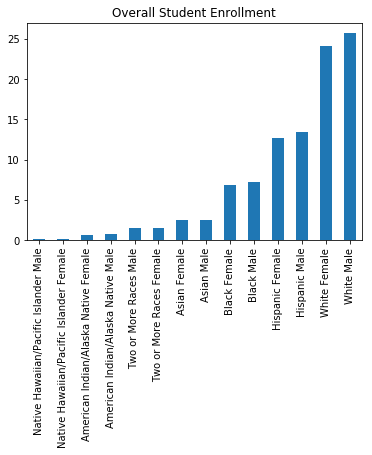

Percentages of groups categorised by gender and race
Hispanic Male                              13.44
Hispanic Female                            12.72
American Indian/Alaska Native Male          0.73
American Indian/Alaska Native Female        0.69
Asian Male                                  2.57
Asian Female                                2.47
Native Hawaiian/Pacific Islander Male       0.18
Native Hawaiian/Pacific Islander Female     0.19
Black Male                                  7.21
Black Female                                6.91
White Male                                 25.71
White Female                               24.14
Two or More Races Male                      1.52
Two or More Races Female                    1.53
dtype: float64



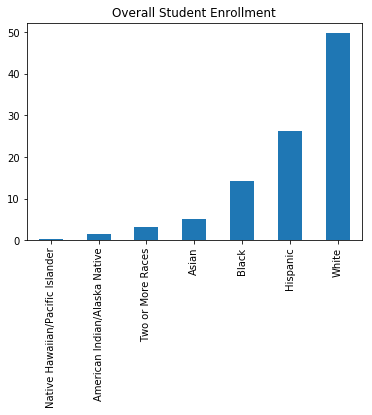

Percentages of groups categorised by race
American Indian/Alaska Native        1.41
Asian                                5.04
Black                               14.12
Hispanic                            26.16
Native Hawaiian/Pacific Islander     0.37
Two or More Races                    3.05
White                               49.85
dtype: float64


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sys import argv
import numpy as np

%matplotlib inline
topicString = argv[1]

def compareGenderRace(topicString):
    """
    topicString: Beginning of a column label which defines the topic.
                In relevant column labels, this string is followed by
                strings defining race and gender.
                e.g. Column label "SCH_ENR_HI_F" means number of female("F")
                hispanic ("HI") students enrolled in school ("SCH_ENR").
                The topicString in this case is "SCH_ENR".
    
    Displays table and bar plots for each gender+race group
    and then for each race group.
    """
    # read in label info for dataset
    contents = pd.read_csv("data/CRDC2013_14content.csv")

    # read in dataset
    data = pd.read_csv("data/CRDC2013_14.csv", encoding="Latin-1")

    # get each school's total number of enrolled students
    data["total_enrollment"] = data["TOT_ENR_M"] + data["TOT_ENR_F"]

    # get relevant columns
    cols = [col for col in data.columns \
    if col.startswith(topicString) and \
    "_LEP_" not in col and \
    "_504_" not in col and \
    "_IDEA_" not in col]
    
    cols.append("total_enrollment")
    
    data_temp = pd.DataFrame()
    for col in cols:
        # remove negative values
        data_temp[col] = data.loc[data[col].ge(0), col]
    
    all_enrollment, cols_sums = getTotEnrAndSum(data_temp[cols])
    
    # get sums of all of the columns that break down enrollment by race.
    cols_ng = []
    oldCol_ng = None
    
    for col in sorted(cols):
        
        # remove gender label
        col_ng = col[:-2]
        
        # add columns for both genders together
        if oldCol_ng == col_ng:
            data[col_ng] = data[col_ng].add(data[col])
            cols_ng.append(col_ng)
        else:
            data[col_ng] = data[col]
            oldCol_ng = col_ng
    
    cols_ng.append("total_enrollment")
            
    data_temp = pd.DataFrame()
    for col_ng in cols_ng:
        # remove negative values
        data_temp[col_ng] = data.loc[data[col_ng].ge(0), col_ng]
    all_ng_enrollment, cols_ng_sums = getTotEnrAndSum(data_temp[cols_ng])

    # rename columns
    cols_map = {}
    cols_ng_map = {}
    
    topic = None
    for index, row in contents[["NAME", "LABEL"]].iterrows():

        name = row["NAME"]

        if name in cols:
            row_split = row["LABEL"].split(": ")
            new_label = "".join(row_split[1:])
            
            # dict for gender+race data
            cols_map[name] = new_label
        
            # dict for race data
            cols_ng_map[name[:-2]] = re.sub("\ Male$|\ Female$", "", new_label)

            # get topic
            if topic == None:
                topic = row_split[0]

    cols_sums.rename(index=cols_map, inplace=True)
    cols_ng_sums.rename(index=cols_ng_map, inplace=True)

    # get ratio of each enrolled gender-race group among the total enrolled students
    cols_perc = cols_sums / all_enrollment * 100
    ax = cols_perc.sort_values().plot.bar()
    ax.set_title(topic)
    plt.show()
    
    print("Percentages of groups categorised by gender and race")
    print(round(cols_sums / all_enrollment * 100, 2))
    print()
    
    # get ratio of each enrolled race group among the total enrolled students    
    cols_ng_perc = cols_ng_sums / all_ng_enrollment * 100
    ax = cols_ng_perc.sort_values().plot.bar()
    ax.set_title(topic)
    plt.show()
    
    print("Percentages of groups categorised by race")
    print(round(cols_ng_sums / all_ng_enrollment * 100, 2))


def getTotEnrAndSum(df):
    
    # remove null values
    df.dropna(inplace=True)
    
    # get all schools' total number of enrolled students
    all_enrollment = df["total_enrollment"].sum()
    
    # remove total number of enrolled students from data frame
    df.drop("total_enrollment", axis=1, inplace=True)
    
    # get sums of all of the columns that break down enrollment by race and gender.
    cols_sums = df.sum()
    
    return all_enrollment, cols_sums

if __name__ == "__main__":
    topicString = argv[1] if argv[1] != "-f" else "SCH_ENR"
    compareGenderRace(topicString)

```
White students formed the majority, followed by hispanic and black students, etc. In all groups, male and female ratios were similar.

This demographics of students (collected in 2013-2014) is largely inconsistent with the [whole population demographics (from 2015)](https://en.wikipedia.org/wiki/Demography_of_the_United_States#Race_and_ethnicity). The agreeing part was that white people were the majority, but the second biggest group was black, followed by "Some other race". The proportions of some minority groups ("Two or more races" and "Asian") appear similar.

[Sex ratio data from 2010](https://en.wikipedia.org/wiki/Demography_of_the_United_States#Sex_ratios) also largely agrees with this dataset: male-to-female ratio ranges from 1 to 1.048 across ages 0 - 64.
```

The above-text is saved in `findings.txt`.

# 5. Moving the Data Files to a Separate Folder

Done in [step 2](#2.-Running-a-Python-Script-to-Explore-the-Columns).

# 6. Next Steps

## 6.1. Review explusions

### 6.1.1. Students without disabilities who received an expulsion without educational services

Students without disabilities who received an expulsion without educational services


sex,Female,Male
race,,
Native Hawaiian/Pacific Islander,0,0
American Indian/Alaska Native,0,4
Asian,0,4
Two or More Races,13,24
Hispanic,12,40
White,26,119
Black,67,152


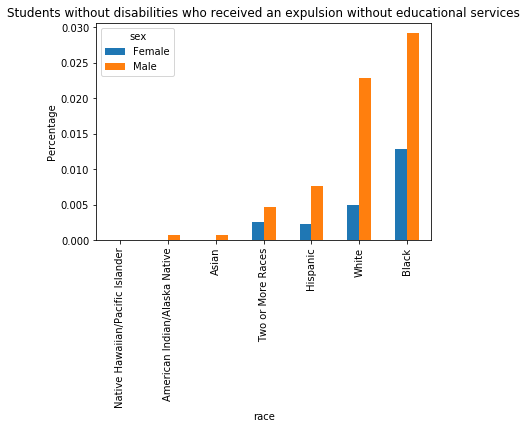

In [4]:
def compareGenderRace2(topicString):
    """
    This is a compact version of
    the above-defined function compareGenderRace.
    
    Also, compareGenderRace could be run from command line
    where user could specify topicString (if unspecified,
    topicString would be "SCH_ENR").
    
    On the other hand, compareGenderRace2 is not for
    command line. This is suited for within-notebook
    demonstration.
    """

    # read in label info for dataset
    contents = pd.read_csv("data/CRDC2013_14content.csv")

    # read in dataset
    data = pd.read_csv("data/CRDC2013_14.csv", encoding="Latin-1")

    # get each school's total number of enrolled students
    data["total_enrollment"] = data["TOT_ENR_M"] + data["TOT_ENR_F"]

    # get sums of all of the columns that break down enrollment by race and gender.
    cols = [col for col in data.columns \
    if col.startswith(topicString) and \
    "_LEP_" not in col and \
    "_504_" not in col and \
    "_IDEA_" not in col]

    cols.append("total_enrollment")

    data_temp = pd.DataFrame()
    for col in cols:
        # remove negative values
        data_temp[col] = data.loc[data[col].ge(0), col]

    all_enrollment, cols_sums = getTotEnrAndSum(data_temp[cols])
    
    # rename columns
    cols_map = {}
    
    topic = None
    for index, row in contents[["NAME", "LABEL"]].iterrows():

        name = row["NAME"]

        if name in cols:
            row_split = row["LABEL"].split(": ")
            new_label = "".join(row_split[1:])
            
            # dict for gender+race data
            cols_map[name] = new_label
        
            # get topic
            if topic == None:
                topic = row_split[0]
    print(topic)
    cols_sums.rename(index=cols_map, inplace=True)
    
    # get all schools' total number of enrolled students
    all_enrollment = data["total_enrollment"].sum()
    
    # Rearrange data by sex and race
    cols_sums = cols_sums.reset_index()
    cols_sums.rename(columns={0: "count"}, inplace=True)

    # add sex column
    cols_sums = pd.concat([cols_sums, pd.Series(["Male" if i.endswith("Male") else "Female" for i in cols_sums["index"].values]).rename("sex", inplace=True)], axis=1)
    
    # add race column
    cols_sums = pd.concat([cols_sums, pd.Series([re.sub("\ Male$|\ Female$", "", i) for i in cols_sums["index"].values]).rename("race", inplace=True)], axis=1)
    cols_sums.set_index("index", inplace=True)
    
    # create pivot table
    cols_sums = cols_sums.pivot_table(index="race", values="count", columns="sex", aggfunc=np.sum)
    
    # sort values by Female group (source https://stackoverflow.com/a/41121203)
    cols_sums = cols_sums.reindex(cols_sums[["Female", "Male"]].sort_values(by=["Male", "Female"]).index)
    
    # display table
    display(cols_sums)
    
    # draw and display plot
    ax = ((cols_sums / all_enrollment) * 100).plot.bar()
    ax.set_ylabel("Percentage")
    ax.set_title(topic)
    plt.show()

compareGenderRace2("SCH_DISCWODIS_EXPWOE")

Male students without disabilities were always more likely to be expelled than their female counterparts.

Black group came on top, followed by white, Hispanic and other groups.

### 6.1.2 Students without disabilities who received an expulsion without educational services

sex,Female,Male
race,,
received an expulsion under zero tolerance policies,5,4
received an expulsion without educational services,2,8
received an expulsion with educational services,4,8
received a school-related arrest,2,10
were referred to a law enforcement agency or official,11,32
received more than one out-of-school suspension,166,312
received corporal punishment,147,442
received only one out-of-school suspension,382,603
received one or more in-school suspensions,1012,1574


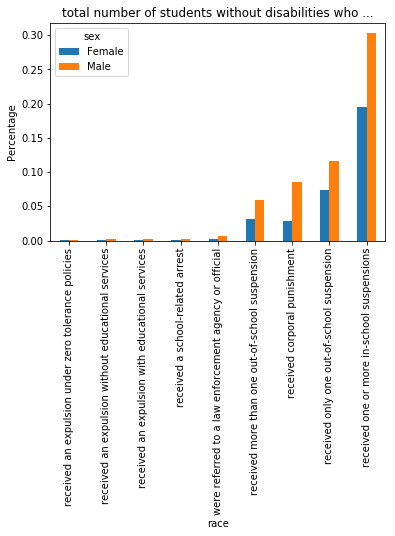

In [5]:
def long_substr(data):
    """
    from https://stackoverflow.com/a/2894073
    
    data: list of strings
    
    returns substring that commonly exist across
    items in data
    """
    substr = ''
    if len(data) > 1 and len(data[0]) > 0:
        for i in range(len(data[0])):
            for j in range(len(data[0])-i+1):
                if j > len(substr) and all(data[0][i:i+j] in x for x in data):
                    substr = data[0][i:i+j]
    return substr


def is_substr(find, data):
    """
    from https://stackoverflow.com/a/2894073
    
    used as part of long_substr function
    """
    if len(data) < 1 and len(find) < 1:
        return False
    for i in range(len(data)):
        if find not in data[i]:
            return False
    return True

def compareGenderRace3(topicString):
    """
    This is a modified version of compareGenderRace2.
    
    Modification has been made to deal with columns whose
    labels do not specify gender.
    
    For example, column label "TOT_DISCWODIS_CORP_M"
    only has "M" (male ) at the end, so compareGenderRace3 is to be used.
    
    On the other hand, "SCH_ENR_HI_F" has "HI" (hispanic)
    and "F" (female) at the end, so compareGenderRace2 is to be used.
    """

    # read in label info for dataset
    contents = pd.read_csv("data/CRDC2013_14content.csv")

    # read in dataset
    data = pd.read_csv("data/CRDC2013_14.csv", encoding="Latin-1")

    # get each school's total number of enrolled students
    data["total_enrollment"] = data["TOT_ENR_M"] + data["TOT_ENR_F"]

    # get sums of all of the columns that break down enrollment by race and gender.
    cols = [col for col in data.columns \
    if col.startswith(topicString) and \
    "_LEP_" not in col and \
    "_504_" not in col and \
    "_IDEA_" not in col]

    cols.append("total_enrollment")
    
    data_temp = pd.DataFrame()
    for col in cols:
        # remove negative values
        data_temp[col] = data[col][data[col] >= 0]
    
    all_enrollment, cols_sums = getTotEnrAndSum(data_temp[cols])
    
    # rename columns
    cols_map = {}
    
    for index, row in contents[["NAME", "LABEL"]].iterrows():

        name = row["NAME"]

        if name in cols:
            label = row["LABEL"]
            
            # dict for gender+race data
            cols_map[name] = label
        
    cols_map_commonString = long_substr([val.lower() for key, val in cols_map.items()])
    cols_map = {key: val.lower().replace(cols_map_commonString, "") for key, val in cols_map.items()}
    
    cols_sums.rename(index=cols_map, inplace=True)
    
    # get all schools' total number of enrolled students
    all_enrollment = data["total_enrollment"].sum()
    
    # Rearrange data by sex and race
    cols_sums = cols_sums.reset_index()
    cols_sums.rename(columns={0: "count"}, inplace=True)
    
    # add sex column
    cols_sums = pd.concat([cols_sums, pd.Series(["Male" \
                                                 if i.endswith(": male") \
                                                 else "Female" \
                                                 for i in cols_sums["index"].values])\
                                                .rename("sex", inplace=True)], axis=1)

    # add race column
    cols_sums = pd.concat([cols_sums, pd.Series([re.sub(":\ male$|:\ female$", "", i) \
                                                 for i in cols_sums["index"].values])\
                                                .rename("race", inplace=True)], axis=1)
    cols_sums.set_index("index", inplace=True)
    
    # create pivot table
    cols_sums = cols_sums.pivot_table(index="race", values="count", columns="sex", aggfunc=np.sum)
    
    # sort values by Female group (source https://stackoverflow.com/a/41121203)
    cols_sums = cols_sums.reindex(cols_sums[["Female", "Male"]].sort_values(by=["Male", "Female"]).index)

    # display table
    display(cols_sums)
    
    # draw and display plot
    ax = ((cols_sums / all_enrollment) * 100).plot.bar()
    ax.set_ylabel("Percentage")
    ax.set_title(cols_map_commonString + "...")
    plt.show()

compareGenderRace3("TOT_DISCWODIS")

Boys got in more trouble than girls. In-school suspension was most common form of penalisation, while out-of-school suspensions were most common among other types of penalties.

## 6.2. Gender and race differences in SAT scores

SAT or ACT Test Participation


sex,Female,Male
race,,
Native Hawaiian/Pacific Islander,185,188
American Indian/Alaska Native,192,191
Two or More Races,363,301
Asian,1666,1537
Hispanic,2399,1915
Black,2468,1993
White,9404,8447


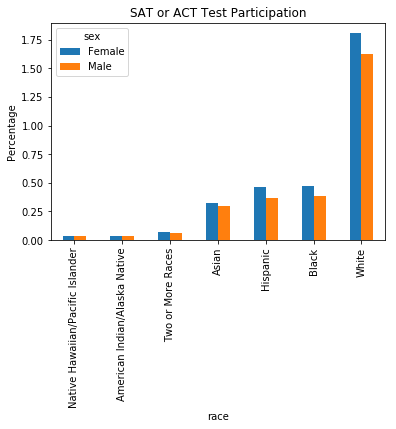

In [6]:
compareGenderRace2("SCH_SATACT")

Girls participated in SAT or ACT tests more often than boys. White children most actively participated in the tests, who comprised 1.75% of the whole population. Black, Hispanic, Asian and other groups followed.


# 7. Tasks for later

Following are tasks suggested by DataQuest team. These are to be done later.

*   Figure out the racial and gender breakdowns for different types of schools, such as magnet schools.
*   Determine how many students are in gifted and talented programs, or advanced placement classes.
*   Investigate how racial differences in enrollment change from preschool to high school.
*   Explore school bullying. The `SCH_HBDISCIPLINED_DIS_HI_M` column contains some of this information.